I want to look at what happens when Tweets trend. Where are the nodes that use the hashtag in the network? 

In [1]:
import graph_tool.all as gt
import preprocessing
from config import TRENDS_DIR
%load_ext autoreload
%autoreload 2
import pandas as pd
import tqdm
import gzip
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from config import TWITTER_DATA_DIR, FOLLOWER_DATA_DIR
import pickle
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm.notebook import tqdm
import graphviz as gr
import warnings
import network_plots
import numpy as np
from trending import build_df, get_trend_behavior
warnings.filterwarnings('ignore')
import trending

In [2]:
campaigns = preprocessing.load_campaign()

In [3]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [4]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

In [26]:
_, df = trending.build_df(hashtag, tweets, exposures,
                          raw_df_too=True, include_missing=False)

In [57]:
users = list(df.username.unique())
username_dict = {u: i for i,u in enumerate(users)}
edges = []
for i, user in enumerate(users):
    path = os.path.join(FOLLOWER_DATA_DIR, user + '.gz')
    if os.path.exists(path):
        f = gzip.open(path, 'rb')
        followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
        edges += [(username_dict[x], i) for x in followers if x in username_dict]
   


In [58]:
len(edges)

38677

In [61]:
g = gt.Graph()
g.add_edge_list(edges)

In [202]:
zero_exposure_trending_users = set(df.query('total_exposure == 0 & adj_date > inferred_trending_start').username.unique())


In [203]:
len(zero_exposure_trending_users)

72

In [138]:
zero_exposure_trending_users = set(df.query('total_exposure == 0 & adj_date > inferred_trending_start').username.unique())


t = filter_nodes(big_g, zero_exposure_trending_users, include_neighborhood=True, max_neighbors=1000)
t

should be this many users 72


<GraphView object, directed, with 2550 vertices and 254535 edges, 1 internal vertex property, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaafb0b6d00, at 0x2aaafb035a00>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaafb0b6d00, at 0x2aaafb035c40>, False), at 0x2aaafb0b6d00>

should be this many users 979


<GraphView object, directed, with 4530 vertices and 698425 edges, 2 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaafb9ffe80, at 0x2aaafba35250>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaafb9ffe80, at 0x2aaafba35b50>, False), at 0x2aaafb9ffe80>

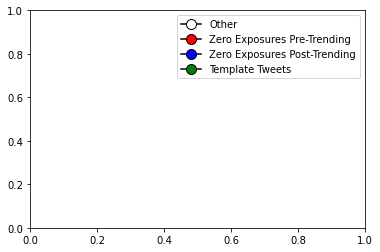

In [167]:
t = network_plots.filter_nodes(big_g, set(df.username.unique()), 
                 include_neighborhood=True, max_neighbors=100,
                 largest_component=True)

t = network_plots.color_vertices(t, df)    
t

should be this many users 979


<GraphView object, directed, with 795 vertices and 35639 edges, 2 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaafbe3f1c0, at 0x2aaafbd86fd0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaafbe3f1c0, at 0x2aaafbe70910>, False), at 0x2aaafbe3f1c0>

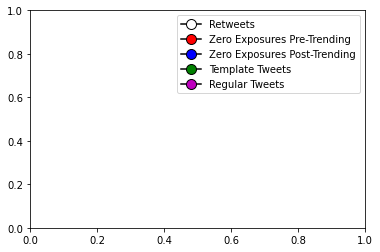

In [207]:
t = network_plots.filter_nodes(big_g, set(df.username.unique()), 
                 include_neighborhood=False, max_neighbors=1000,
                 largest_component=True)

t = network_plots.color_vertices(t, df)    
t

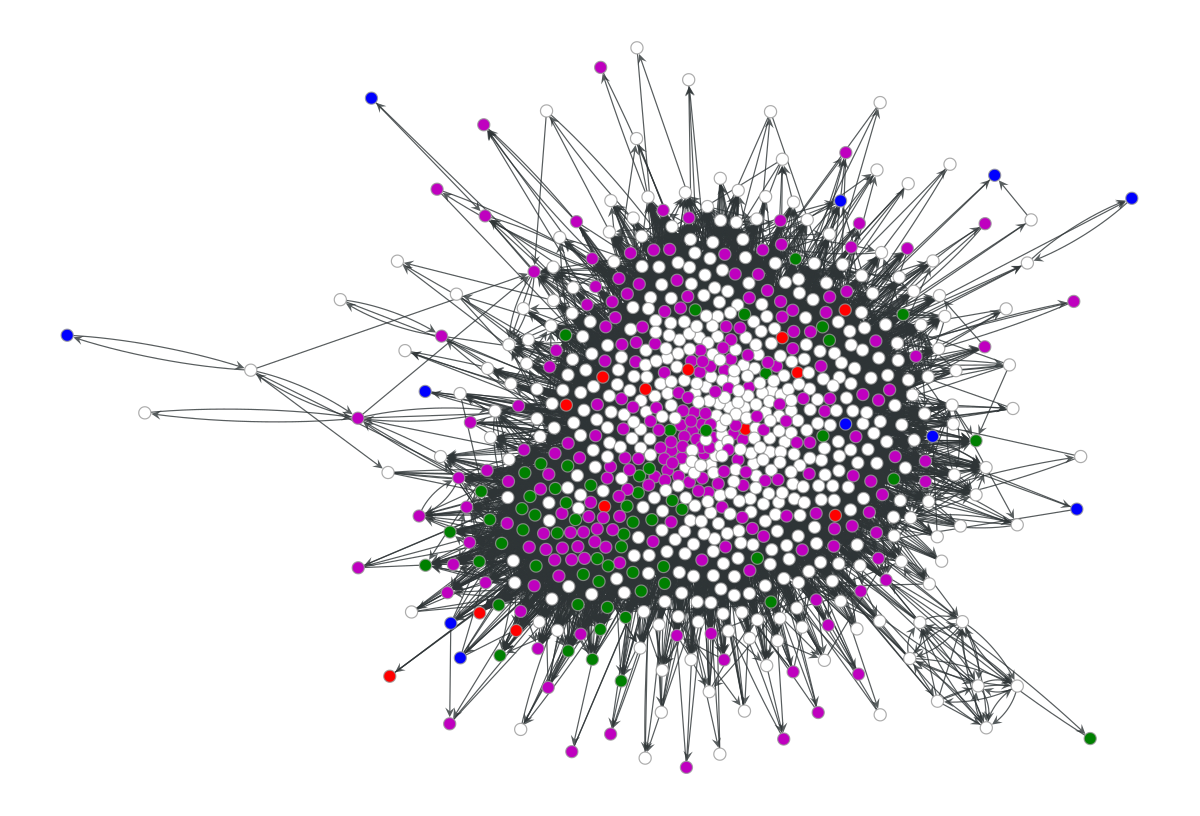

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaafbe3f1c0, at 0x2aaafbe709d0>

In [208]:
gt.graph_draw(t, vertex_fill_color=t.vp.colors)

In [194]:
t.purge_vertices()
t

<GraphView object, directed, with 15883 vertices and 3801538 edges, 2 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaafbb9d580, at 0x2aaafbc2c490>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaafbb9d580, at 0x2aaafbb907c0>, False), at 0x2aaafbb9d580>

In [195]:
t.save(os.path.join(TWITTER_DATA_DIR, 'temp.graphml'))

In [193]:
TWITTER_DATA_DIR

'/home/jschless/whatsapp/data/twitter-coordination-src/data'

In [189]:
c, hist = gt.label_components(t)

In [190]:
hist

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1, 15699,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,

In [184]:
gt.GraphView(t, vfilt=c.a==0)

<GraphView object, directed, with 1 vertex and 0 edges, 2 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaafbb90910, at 0x2aaafbb93d00>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaafbb90910, at 0x2aaafbb93f40>, False), at 0x2aaafbb90910>

In [204]:
c.a

PropertyArray([21, 22, 21, ..., 21, 21, 12], dtype=int32)

In [175]:
max(c.a)

85

In [ ]:
# label the components in a property map
c = label_components(g)[0]

# "extract" component number 3
u = GraphView(g, vfilt=c.a == 3)

## Building out Data Structures for giant follower network
Attributes of interest: 
- usernames
- types
- # of hashtags participated in 

In [5]:
g = network_plots.load_follower_network()
g

<Graph object, directed, with 115597 vertices and 27187816 edges, 1 internal vertex property, at 0x2aaaf94fbf10>

In [6]:
dfs = []
for hashtag, tweets in tqdm(campaigns.items()):
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        _, df = trending.build_df(hashtag, tweets, exposures,
                                  raw_df_too=True, include_missing=False)
        dfs.append(df)
panel_df = pd.concat(dfs)
panel_df.head()

,username,id,retweet_from,template,retweet_id,text,date,retweets,favorites,adj_date,type,follower_data,template_exposure,normal_exposure,total_exposure,trending_start,inferred_trending_start,hashtag
adj_date,,,,,,,,,,,,,,,,,,
2019-09-12 11:57:01,bjp4latehar,1172033856607682560,,,,आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या...,2019-09-12 06:27:01,0,0,2019-09-12 11:57:01,regular,True,151,64,215,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-09-12 16:52:28,vjay21788,1172108207499558912,ommathur_bjp,,1172063209785741312,rt @ommathur_bjp: #bharatmatakijai भारत माता क...,2019-09-12 11:22:28,140,0,2019-09-12 16:52:28,regular_retweet,True,146,271,417,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-02-17 15:16:25,vagrawa3,1097069751128358914,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,2019-02-17 09:46:25,0,0,2019-02-17 15:16:25,template,True,5,10,15,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-09-12 15:17:32,ashishmerkhed,1172084320225263619,bjp4india,,1172082904316334080,rt @bjp4india: चुनाव के समय मैंने आपसे कामदार ...,2019-09-12 09:47:32,456,0,2019-09-12 15:17:32,regular_retweet,True,59,60,119,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi
2019-02-17 18:01:30,manishkbjp,1097111295562678276,bjp4jharkhand,2014 तक हायर सेकेंडरी स्कूलों की संख्या 653 थी...,1097067864467550208,rt @bjp4jharkhand: 2014 तक हायर सेकेंडरी स्कूल...,2019-02-17 12:31:30,6,14,2019-02-17 18:01:30,template_retweet,True,218,53,271,2019-02-17 15:30:00,2019-02-17 14:20:00,jharkhandwithmodi


In [7]:
g = network_plots.label_vertices(g, panel_df)

115597it [2:47:55, 11.47it/s]


In [ ]:
print('hi')

In [9]:
g.save(os.path.join(TWITTER_DATA_DIR, 'full_follower_network_labeled.gt'))

## Constructing a Giant Follower Network

In [10]:
users = [x[:-3] for x in os.listdir(FOLLOWER_DATA_DIR)]
username_dict = {u: i for i,u in enumerate(users)}
edges = []
for i, user in enumerate(tqdm(users)):
    path = os.path.join(FOLLOWER_DATA_DIR, user + '.gz')
    f = gzip.open(path, 'rb')
    try:
        followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
        edges += [(username_dict[x], i) for x in followers if x in username_dict]
    except Exception as e:
        print(e, 'issue with ', user)


list index out of range issue with  advdeepak09
list index out of range issue with  anushatsashishpandit
list index out of range issue with  faraktesuresh
list index out of range issue with  juniorbjyotijuaa
list index out of range issue with  kajal_barge
list index out of range issue with  kolinilangi
list index out of range issue with  movies_it
list index out of range issue with  prakaspiyushsinghvi3
list index out of range issue with  sharmilafarsenthazalravi
list index out of range issue with  shyamsu08245833
list index out of range issue with  sukhsandhappysrkfan



In [12]:
import pickle, os
from config import TWITTER_DATA_DIR

with open(os.path.join(TWITTER_DATA_DIR, 'follower_network_edge_list_and_dict.pkl'), 'wb') as f:
    pickle.dump((edges, username_dict), f)

In [13]:
big_g = gt.Graph()
big_g.add_edge_list(edges)

In [125]:
usernames = big_g.new_vertex_property('string')
# for v, u in zip(big_g.iter_vertices(), username_dict.values()):
#     usernames[v] = u
for u, v in username_dict.items():
    usernames[v] = u

big_g.vp.usernames = usernames

In [43]:
big_g.save(os.path.join(TWITTER_DATA_DIR, 'follower_network.gt'))

In [76]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge ipywidgets

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/jschless/.conda/envs/gt:

The following NEW packages will be INSTALLED:

    argon2-cffi:         20.1.0-py38h497a2fe_2   conda-forge
    async_generator:     1.10-py_0               conda-forge
    attrs:               20.3.0-pyhd3deb0d_0     conda-forge
    bleach:              3.2.3-pyh44b312d_0      conda-forge
    cffi:                1.14.4-py38ha312104_0   conda-forge
    defusedxml:          0.6.0-py_0              conda-forge
    entrypoints:         0.3-pyhd8ed1ab_1003     conda-forge
    importlib-metadata:  3.4.0-py38h578d9bd_0    conda-forge
    importlib_metadata:  3.4.0-hd8ed1ab_0        conda-forge
    ipywidgets:          7.6.3-pyhd3deb0d_0      conda-forge
    jsonschema:          3.2.0-py_2              conda-forge
    jupyterlab_pygments: 0.1.2-pyh9f0ad1d_0      conda-forge
    jupyterlab_widgets:  1.0.0-pyhd8ed1ab_1      conda-forge
    mistun